### LIBRARIES

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np     
import datetime as dt 

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score
import category_encoders as ce 


### UPLOADING OUR TRAIN DATASET

In [2]:
train = pd.read_csv('train.csv')

### UPLOADING OUR TEST DATASET

In [3]:
test = pd.read_csv('test.csv')

### Working With TRAIN

In [4]:
train.info() # Checking Train information(Non null values and Datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  15000 non-null  float64
 1   Y                  15000 non-null  float64
 2   OBJECTID           15000 non-null  int64  
 3   INDEX_             15000 non-null  int64  
 4   ACCNUM             11302 non-null  float64
 5   DATE               15000 non-null  object 
 6   TIME               15000 non-null  int64  
 7   STREET1            15000 non-null  object 
 8   STREET2            13657 non-null  object 
 9   OFFSET             1928 non-null   object 
 10  ROAD_CLASS         14643 non-null  object 
 11  DISTRICT           14984 non-null  object 
 12  LATITUDE           15000 non-null  float64
 13  LONGITUDE          15000 non-null  float64
 14  ACCLOC             9550 non-null   object 
 15  TRAFFCTL           14971 non-null  object 
 16  VISIBILITY         149

In [5]:
test.info()# Checking Test information(Non null values and Datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  3956 non-null   float64
 1   Y                  3956 non-null   float64
 2   OBJECTID           3956 non-null   int64  
 3   INDEX_             3956 non-null   int64  
 4   ACCNUM             2724 non-null   float64
 5   DATE               3956 non-null   object 
 6   TIME               3956 non-null   int64  
 7   STREET1            3956 non-null   object 
 8   STREET2            3593 non-null   object 
 9   OFFSET             1892 non-null   object 
 10  ROAD_CLASS         3827 non-null   object 
 11  DISTRICT           3743 non-null   object 
 12  LATITUDE           3956 non-null   float64
 13  LONGITUDE          3956 non-null   float64
 14  ACCLOC             3950 non-null   object 
 15  TRAFFCTL           3910 non-null   object 
 16  VISIBILITY         3946 

In [6]:
df = train.copy() # Copying train to df
df1 = test.copy() # Copying test to df1

### NUMERICAL AND CATEGORICAL COLUMNS IN TRAIN AND TEST

In [7]:
train_numerical_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns 
# Checking for columns that has numerical datatypes such as 'float64', 'int64', 'int32'
print(train_numerical_cols)

Index(['X', 'Y', 'OBJECTID', 'INDEX_', 'ACCNUM', 'TIME', 'LATITUDE',
       'LONGITUDE', 'FATAL_NO'],
      dtype='object')


In [8]:
test_numerical_cols = df1.select_dtypes(include=['float64', 'int64', 'int32']).columns
print(test_numerical_cols)


Index(['X', 'Y', 'OBJECTID', 'INDEX_', 'ACCNUM', 'TIME', 'LATITUDE',
       'LONGITUDE', 'FATAL_NO'],
      dtype='object')


In [9]:
train_categorical_cols = df.select_dtypes(include=['object']).columns
# Checking for columns that has categorical datatypes such as 'object'
print(train_categorical_cols)

Index(['DATE', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
       'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE',
       'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND',
       'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
       'DIVISION'],
      dtype='object')


In [10]:
test_categorical_cols = df1.select_dtypes(include=['object']).columns
print(test_categorical_cols)

Index(['DATE', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER',
       'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE',
       'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
       'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158',
       'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION'],
      dtype='object')


### HEATMAP

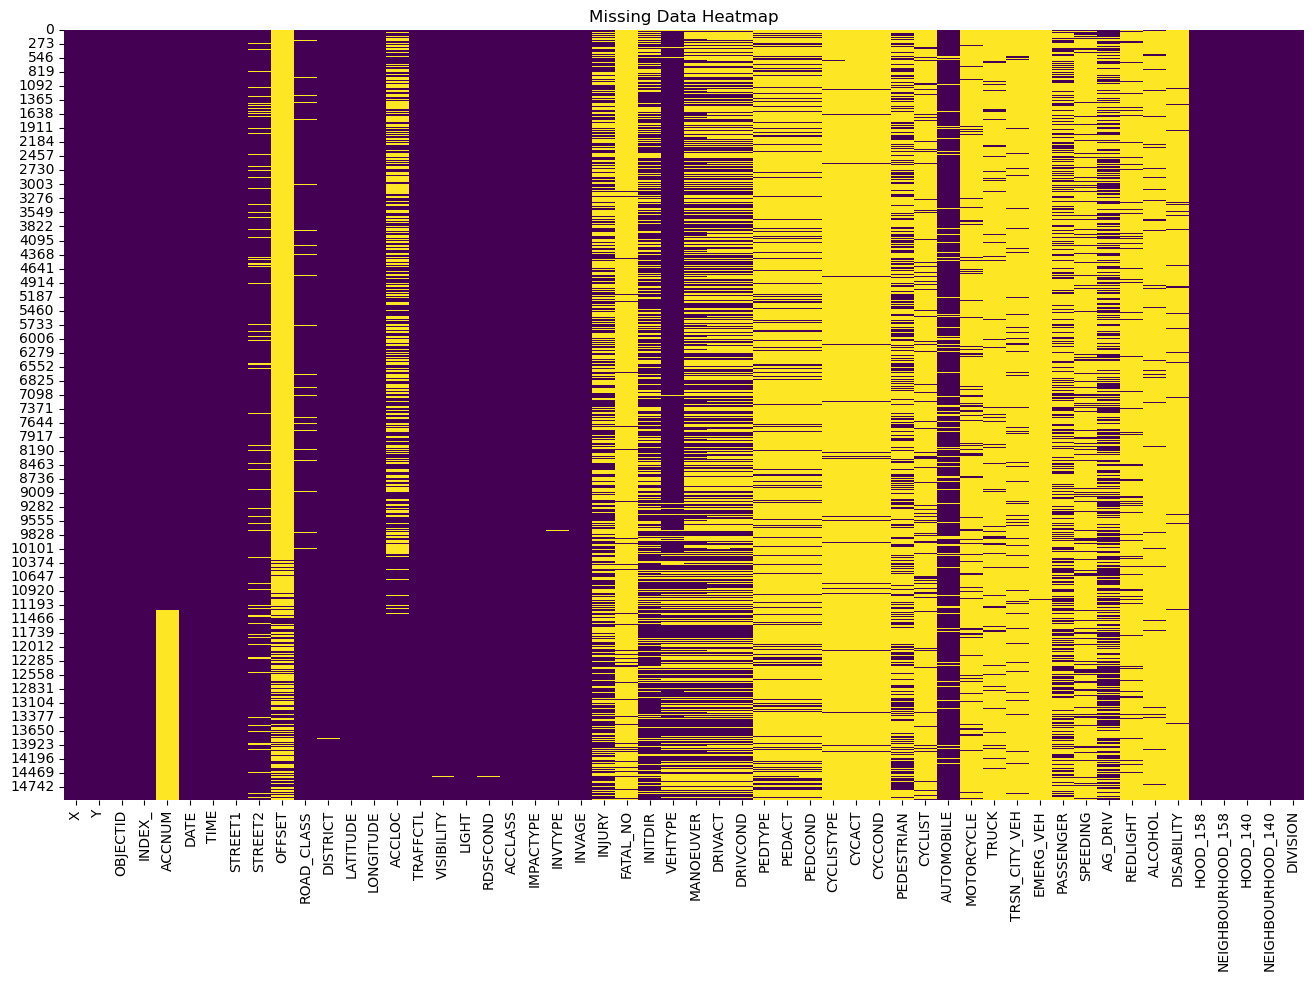

In [11]:
# Visualizing the extent and distribution of missing data
missing_values_summary = df.isnull().sum()
missing_values_summary = missing_values_summary[missing_values_summary > 0].sort_values(ascending=False)

# Visualizing missing values using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

#### X, Y, OBJECTID, INDEX

In [12]:
#Dropping X, Y , Object and Index as it does not provide much info for our analysis
df.drop(columns=['X', 'Y', 'OBJECTID', 'INDEX_', 'DATE', 'TIME', 'OFFSET'], inplace=True)
df1.drop(columns=['X', 'Y', 'OBJECTID', 'INDEX_', 'DATE', 'TIME', 'OFFSET'], inplace=True)

#### STREET1-STREET2

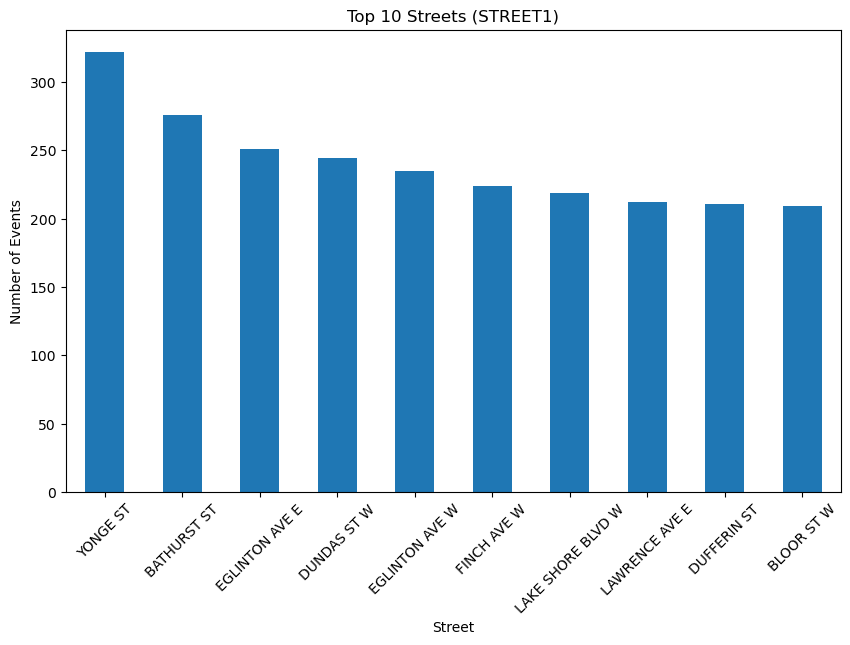

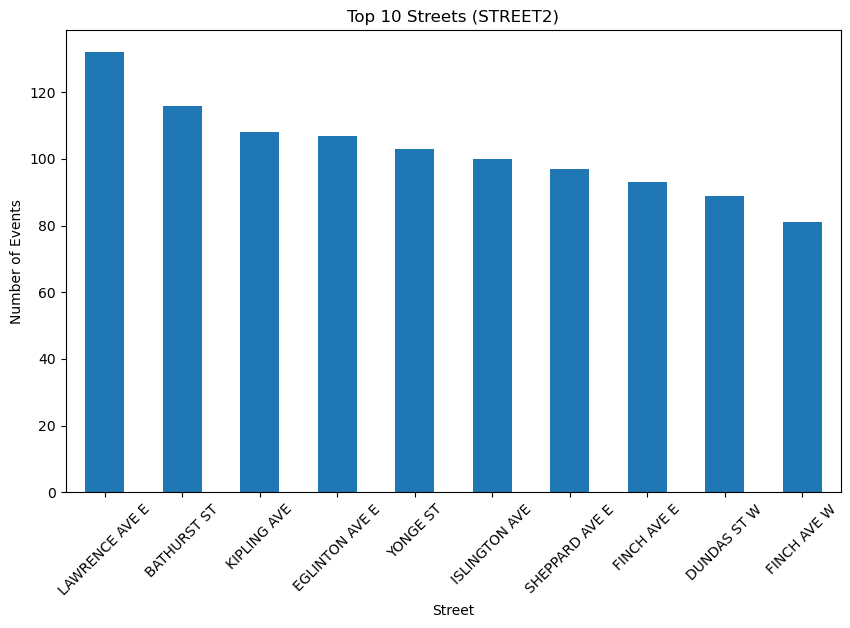

In [13]:
# Plotting the distribution of events for STREET1
plt.figure(figsize=(10, 6))
df['STREET1'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Streets (STREET1)')
plt.xlabel('Street')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of events for STREET2
plt.figure(figsize=(10, 6))
df['STREET2'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Streets (STREET2)')
plt.xlabel('Street')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

In [14]:
### Creating a column that is the concatenation of STREET1, STREET2
df['STREET1-STREET2'] = np.where(df['STREET2'].isnull(), df['STREET1'], df['STREET1'] + '-' + df['STREET2'])
### Creating a column that is the concatenation of STREET1, STREET2
df1['STREET1-STREET2'] = np.where(df1['STREET2'].isnull(), df1['STREET1'], df1['STREET1'] + '-' + df1['STREET2'])

In [15]:
# Combining Street1 and Street2 as we have already combined it
df = df.drop(columns = ['STREET1', 'STREET2'])
df1 = df1.drop(columns = ['STREET1', 'STREET2'])

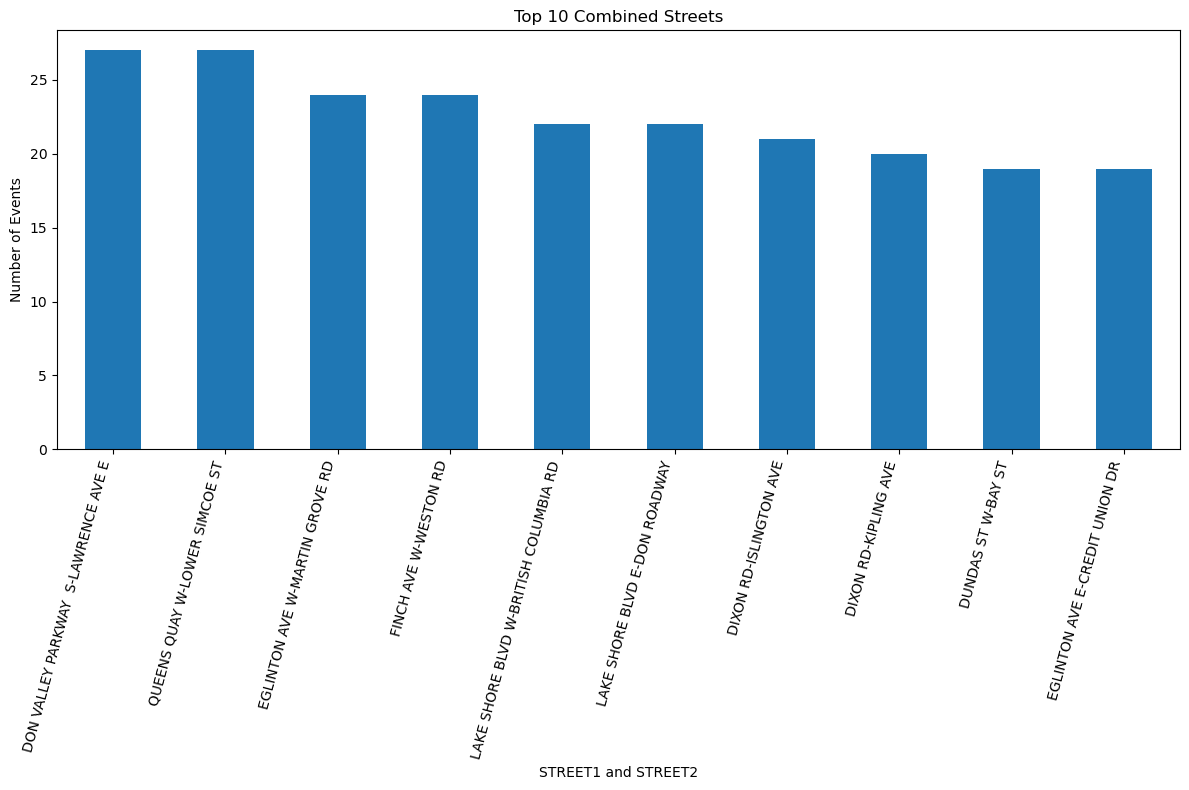

In [16]:
# Plotting the distribution of events for the combined streets
plt.figure(figsize=(12, 8))
df['STREET1-STREET2'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Combined Streets')
plt.xlabel('STREET1 and STREET2')
plt.ylabel('Number of Events')
plt.xticks(rotation=75 , ha='right')
plt.tight_layout()
plt.show()

#### ROAD_CLASS
According to the City of Toronto Road Classification, all roads are classified as:
- expressway
- major arterial road
- minor arterial road
- collector road
- local road
- and laneways

<Figure size 1000x800 with 0 Axes>

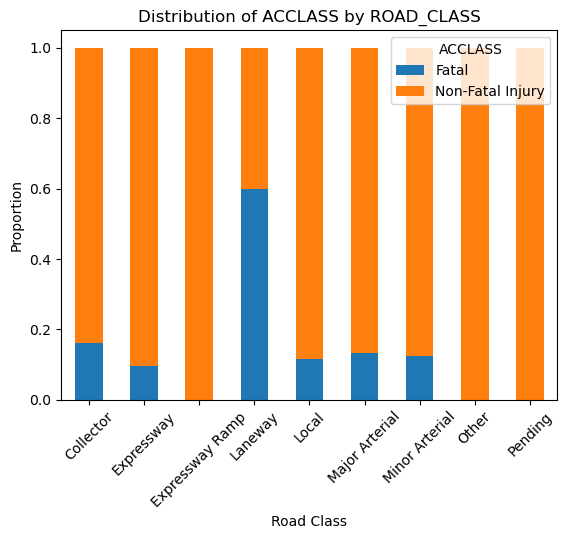

In [17]:
# Creating a crosstab to show the relationship between ROAD_CLASS and ACCLASS
road_class_acclass_crosstab = pd.crosstab(df['ROAD_CLASS'], df['ACCLASS'], normalize='index')

# Plotting the relationship
plt.figure(figsize=(10, 8))
road_class_acclass_crosstab.plot(kind='bar', stacked=True)
plt.title('Distribution of ACCLASS by ROAD_CLASS')
plt.xlabel('Road Class')
plt.ylabel('Proportion')
plt.legend(title='ACCLASS')
plt.xticks(rotation=45)
plt.show()

In [18]:
df.ROAD_CLASS.value_counts()
# Pending does not make sense lets add it to other, Expressway Ramp can be included into Expressway

ROAD_CLASS
Major Arterial     10698
Minor Arterial      2306
Collector            841
Local                723
Expressway            31
Other                 25
Laneway               10
Pending                7
Expressway Ramp        2
Name: count, dtype: int64

In [19]:
#Imputing missing values in Road_class with unknown
df['ROAD_CLASS'] = df['ROAD_CLASS'].fillna('Unknown')
df1['ROAD_CLASS'] = df1['ROAD_CLASS'].fillna('Unknown')

In [20]:
# Mapping for grouped categories
df_road_class_mapping = {
    'Major Arterial': 'Major Arterial',
    'Major Shoreline': 'Other',
    'Minor Arterial': 'Minor Arterial',
    'Collector': 'Collector',
    'Local': 'Local',
    'Expressway': 'Expressway',
    'Laneway': 'Laneway',
    'Unknown': 'Unknown',
    'Other': 'Other',
    'Pending': 'Other',
    'Expressway Ramp': 'Expressway'
}

# Applying the mapping to the 'ACCLOC' column
df['ROAD_CLASS'] = df['ROAD_CLASS'].replace(df_road_class_mapping)

df['ROAD_CLASS'].value_counts()

ROAD_CLASS
Major Arterial    10698
Minor Arterial     2306
Collector           841
Local               723
Unknown             357
Expressway           33
Other                32
Laneway              10
Name: count, dtype: int64

In [21]:
# Mapping for grouped categories
df1_road_class_mapping = {
    'Major Arterial': 'Major Arterial',
    'Major Shoreline': 'Other',
    'Minor Arterial': 'Minor Arterial',
    'Collector': 'Collector',
    'Local': 'Local',
    'Expressway': 'Expressway',
    'Laneway': 'Laneway',
    'Unknown': 'Unknown',
    'Other': 'Other',
    'Pending': 'Other',
    'Expressway Ramp': 'Expressway'
}

# Applying the mapping to the 'ACCLOC' column
df1['ROAD_CLASS'] = df1['ROAD_CLASS'].replace(df1_road_class_mapping)

df1['ROAD_CLASS'].value_counts()

ROAD_CLASS
Major Arterial     2678
Minor Arterial      651
Collector           191
Expressway          145
Local               142
Unknown             129
Major Arterial       13
Other                 6
Laneway               1
Name: count, dtype: int64

#### DISTRICT

- DISTRICT contradicts insights given by STREET1-STREET2, Moreover its more usefull to know the exact intersection of collision rather than knowing the DISTRICT
- Lets drop DISTRICT

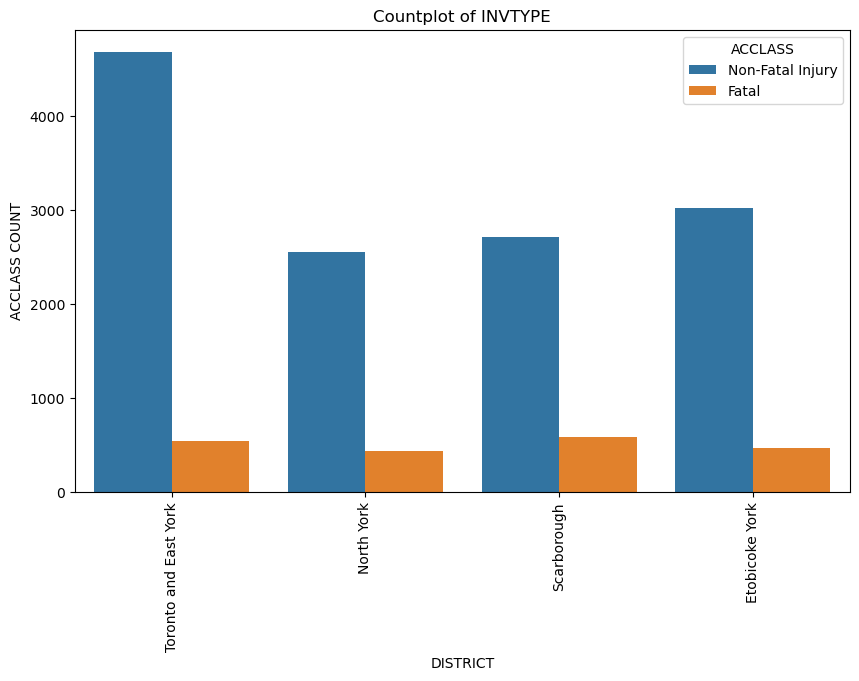

In [22]:
#### Visualizing the distribution of DISTRICTS
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='DISTRICT', hue = 'ACCLASS')
plt.xlabel('DISTRICT')
plt.ylabel('ACCLASS COUNT')
plt.title('Countplot of INVTYPE')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [23]:
#Dropping District as we can get all these info from street1-street2 column itself
df = df.drop(columns=['DISTRICT'])
df1.drop(columns=['DISTRICT'], inplace=True)

#### LATITUDE, LONGITUDE

In [24]:
df.groupby('ACCLASS')['LATITUDE'].value_counts()

ACCLASS           LATITUDE 
Fatal             43.740245    18
                  43.745345    18
                  43.725945    16
                  43.832644    13
                  43.728129    12
                               ..
Non-Fatal Injury  43.780145     1
                  43.779479     1
                  43.645251     1
                  43.646323     1
                  43.774909     1
Name: count, Length: 3713, dtype: int64

- Latitude, and Longitude give us the coordinates of the accident. The STREET1-STREET2 already do this
- Lets drop Latitude and Longitude

In [25]:
#Dropping Latituude and Longitude
df.drop(columns=['LATITUDE', 'LONGITUDE'], inplace=True)
df1.drop(columns=['LATITUDE', 'LONGITUDE'], inplace=True)

#### ACCLOC

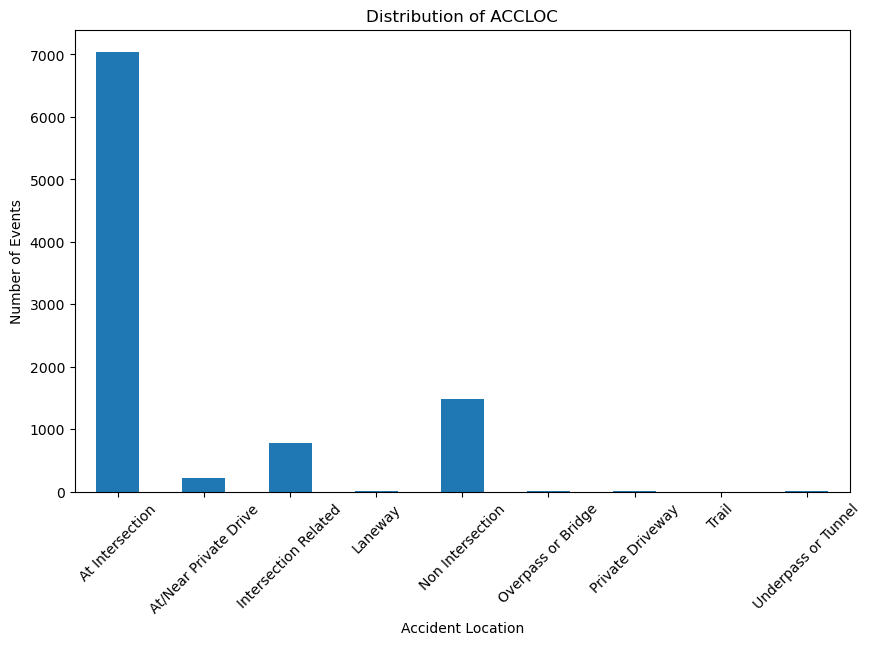

In [26]:
# Plotting the distribution of the ACCLOC column
plt.figure(figsize=(10, 6))
df['ACCLOC'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of ACCLOC')
plt.xlabel('Accident Location')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Plotting ACCLOC with Unknown
df['ACCLOC'] = df['ACCLOC'].fillna('Unknown')
df1['ACCLOC'] = df1['ACCLOC'].fillna('Unknown')

In [28]:
# Mapping for grouped categories
df_acc_loc_mapping = {
    'At Intersection': 'Intersection',
    'Intersection Related': 'Intersection',
    'Non Intersection': 'Non Intersection',
    'At/Near Private Drive': 'Private Drive',
    'Private Driveway': 'Private Drive',
    'Overpass or Bridge': 'Passageways',
    'Underpass or Tunnel': 'Passageways',
    'Laneway': 'Passageways',
    'Trail': 'Other'
}

# Applying the mapping to the 'ACCLOC' column
df['ACCLOC'] = df['ACCLOC'].replace(df_acc_loc_mapping)

df['ACCLOC'].value_counts()

ACCLOC
Intersection        7816
Unknown             5450
Non Intersection    1480
Private Drive        228
Passageways           25
Other                  1
Name: count, dtype: int64

In [29]:
df1_acc_loc_mapping = {
    'At Intersection': 'Intersection',
    'Intersection Related': 'Intersection',
    'Non Intersection': 'Non Intersection',
    'At/Near Private Drive': 'Private Drive',
    'Private Driveway': 'Private Drive',
    'Overpass or Bridge': 'Passageways',
    'Underpass or Tunnel': 'Passageways',
    'Laneway': 'Passageways',
    'Trail': 'Other'
}

# Applying the mapping to the 'ACCLOC' column
df1['ACCLOC'] = df1['ACCLOC'].replace(df1_acc_loc_mapping)

df1['ACCLOC'].value_counts()

ACCLOC
Intersection        2561
Non Intersection    1180
Private Drive        192
Passageways            9
Other                  8
Unknown                6
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

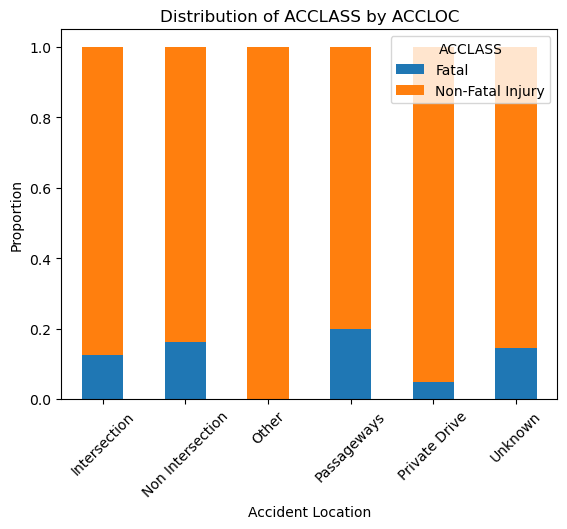

In [30]:
# Creating a crosstab to show the relationship between ACCLOC and ACCLASS
accloc_acclass_crosstab = pd.crosstab(df['ACCLOC'], df['ACCLASS'], normalize='index')

# Plotting the relationship
plt.figure(figsize=(10, 6))
accloc_acclass_crosstab.plot(kind='bar', stacked=True)
plt.title('Distribution of ACCLASS by ACCLOC')
plt.xlabel('Accident Location')
plt.ylabel('Proportion')
plt.legend(title='ACCLASS')
plt.xticks(rotation=45)
plt.show()

#### TRAFFCTL, VISIBILITY

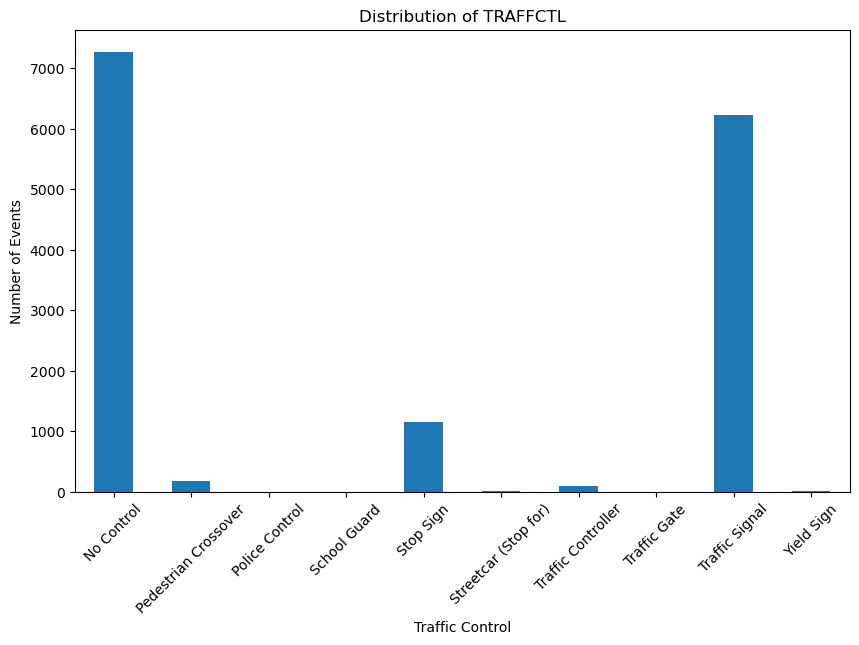

In [31]:
# Plotting the distribution of the TRAFFCTL column
plt.figure(figsize=(10, 6))
df['TRAFFCTL'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of TRAFFCTL')
plt.xlabel('Traffic Control')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

In [32]:
df['TRAFFCTL'].value_counts()

TRAFFCTL
No Control              7271
Traffic Signal          6235
Stop Sign               1154
Pedestrian Crossover     180
Traffic Controller        93
Streetcar (Stop for)      16
Yield Sign                13
Traffic Gate               5
School Guard               2
Police Control             2
Name: count, dtype: int64

In [33]:
# Calculating the mode of the 'TRAFFCTL' column
train_mode_value = df['TRAFFCTL'].value_counts().idxmax()

# Imputing null values in 'TRAFFCTL' with the mode value
df['TRAFFCTL'] = df['TRAFFCTL'].fillna(train_mode_value)

In [34]:
# Mapping for grouped categories
train_traffctl_mapping = {
    'No Control': 'No Control',
    'Traffic Signal': 'Traffic Signal',
    'Stop Sign': 'Stop Sign',
    'Pedestrian Crossover':'Pedestrian Crossover',
    'Traffic Controller': 'Traffic Controller',
    'Yield Sign': 'Yield Sign',
    'Traffic Gate': 'Other',
    'School Guard':'Other',
    'Police Control': 'Other'
    
}

df.TRAFFCTL = df['TRAFFCTL'].map(train_traffctl_mapping)

In [35]:
# Calculating the mode of the 'TRAFFCTL' column
train_mode_value = df['TRAFFCTL'].value_counts().idxmax()

# Imputing null values in 'TRAFFCTL' with the mode value
df['TRAFFCTL'] = df['TRAFFCTL'].fillna(train_mode_value)

In [36]:
# Calculating the mode of the 'TRAFFCTL' column
test_mode_value = df1['TRAFFCTL'].value_counts().idxmax()

# Imputing null values in 'TRAFFCTL' with the mode value
df1['TRAFFCTL'] = df1['TRAFFCTL'].fillna(test_mode_value)

In [37]:
# Mapping for grouped categories
test_traffctl_mapping = {
    'No Control': 'No Control',
    'Traffic Signal': 'Traffic Signal',
    'Stop Sign': 'Stop Sign',
    'Pedestrian Crossover':'Pedestrian Crossover',
    'Traffic Controller': 'Traffic Controller',
    'Yield Sign': 'Yield Sign',
    'Traffic Gate': 'Other',
    'School Guard':'Other',
    'Police Control': 'Other'
    
}

df1.TRAFFCTL = df1['TRAFFCTL'].map(test_traffctl_mapping)

<Figure size 1000x600 with 0 Axes>

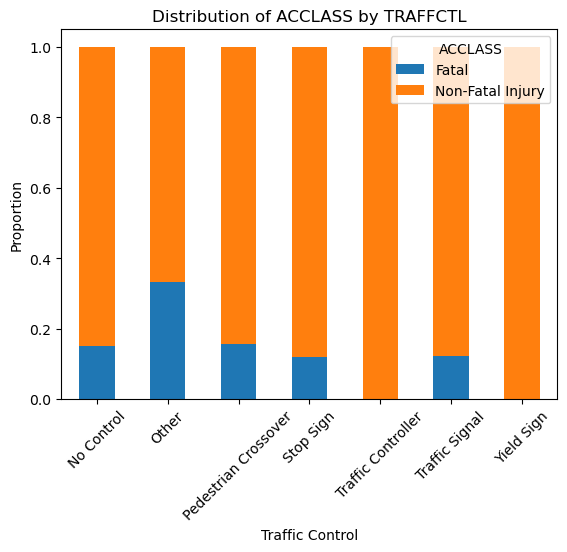

In [38]:
# Creating a crosstab to show the relationship between TRAFFCTL and ACCLASS
traffctl_acclass_crosstab = pd.crosstab(df['TRAFFCTL'], df['ACCLASS'], normalize='index')

# Plotting the relationship
plt.figure(figsize=(10, 6))
traffctl_acclass_crosstab.plot(kind='bar', stacked=True)
plt.title('Distribution of ACCLASS by TRAFFCTL')
plt.xlabel('Traffic Control')
plt.ylabel('Proportion')
plt.legend(title='ACCLASS')
plt.xticks(rotation=45)
plt.show()

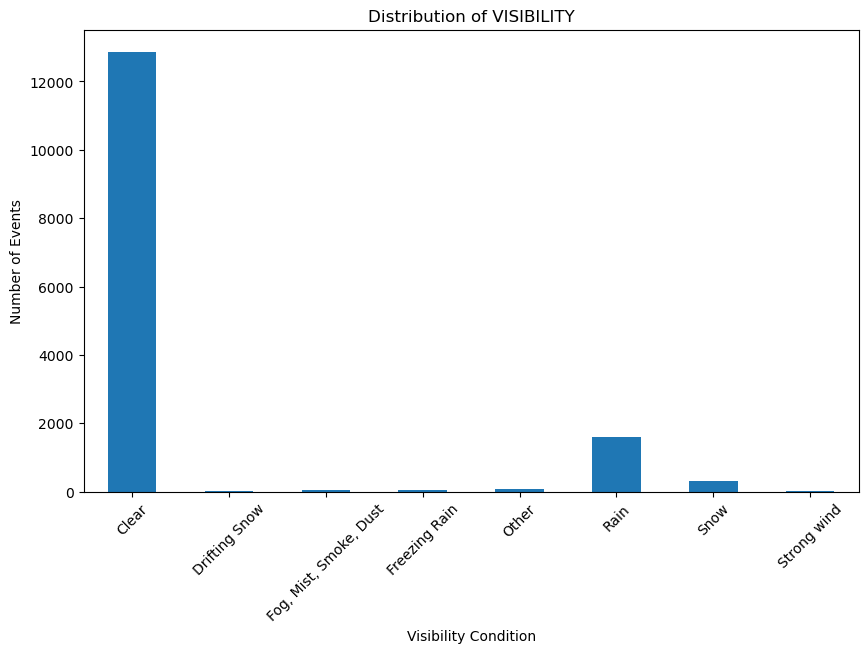

In [39]:
# Plotting the distribution of the VISIBILITY column
plt.figure(figsize=(10, 6))
df['VISIBILITY'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of VISIBILITY')
plt.xlabel('Visibility Condition')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

In [40]:
# Calculating the mode of the 'VISIBILITY' column
train_mode_value = df['VISIBILITY'].value_counts().idxmax()

# Imputing null values in 'VISIBILITY' with the mode value
df['VISIBILITY'] = df['VISIBILITY'].fillna(train_mode_value)

# Calculating the mode of the 'VISIBILITY' column
test_mode_value = df1['VISIBILITY'].value_counts().idxmax()

# Imputing null values in 'VISIBILITY' with the mode value
df1['VISIBILITY'] = df1['VISIBILITY'].fillna(test_mode_value)

In [41]:
# Mapping for grouped categories
visibility_mapping = {
    'Clear': 3,
    'Rain': 2,
    'Snow': 1,
    'Other': 0,
    'Fog, Mist, Smoke, Dust': 0,
    'Freezing Rain': 0,
    'Drifting Snow': 0,
    'Strong wind': 0
}
df['VISIBILITY'] = df['VISIBILITY'].map(visibility_mapping)
df1['VISIBILITY'] = df1['VISIBILITY'].map(visibility_mapping)

#### LIGHT

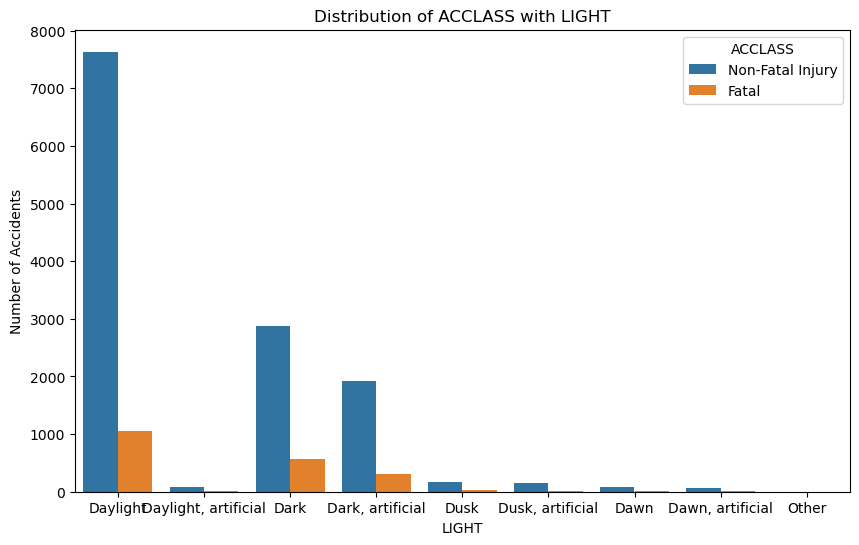

In [42]:
# Plotting the distribution of Light column
plt.figure(figsize = (10,6))
sns.countplot(data=df, x='LIGHT', hue = 'ACCLASS', order=['Daylight', 'Daylight, artificial', 'Dark', 'Dark, artificial', 'Dusk', 'Dusk, artificial',  'Dawn', 'Dawn, artificial', 'Other'])
plt.xlabel('LIGHT')
plt.ylabel('Number of Accidents')
plt.title('Distribution of ACCLASS with LIGHT')
plt.show()

<Figure size 1000x600 with 0 Axes>

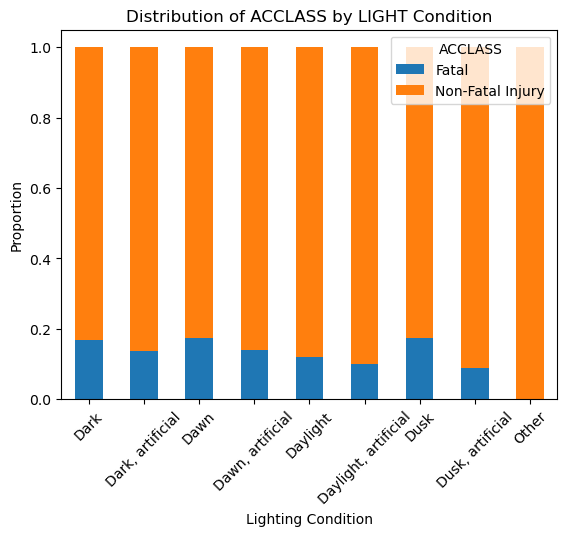

In [43]:
# Creating a crosstab to show the relationship between LIGHT and ACCLASS
light_acclass_crosstab = pd.crosstab(df['LIGHT'], df['ACCLASS'], normalize='index')

# Plotting the relationship
plt.figure(figsize=(10, 6))
light_acclass_crosstab.plot(kind='bar', stacked=True)
plt.title('Distribution of ACCLASS by LIGHT Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Proportion')
plt.legend(title='ACCLASS')
plt.xticks(rotation=45)
plt.show()

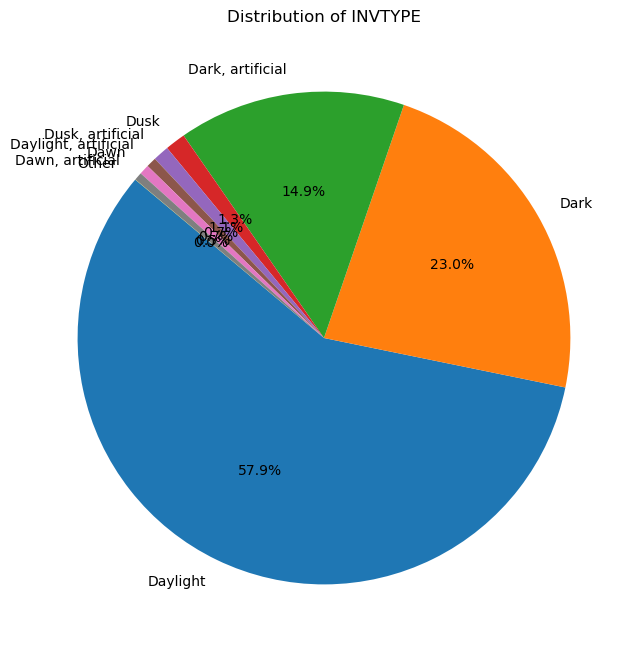

In [44]:
# Plotting the distribution of the INVTYPE column using a pie chart
plt.figure(figsize=(12, 8))
df['LIGHT'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of INVTYPE')
plt.ylabel('')  # Hiding the y-label
plt.show()

In [45]:
df['LIGHT'].value_counts()

LIGHT
Daylight                8684
Dark                    3444
Dark, artificial        2236
Dusk                     201
Dusk, artificial         158
Daylight, artificial      99
Dawn                      98
Dawn, artificial          78
Other                      2
Name: count, dtype: int64

- Most collisions happened in Daylight and Dark
- We can merge the artificial and not artificial columns

In [46]:
# Mapping for grouped categories
light_mapping = {
    'Daylight': 'Daylight',
    'Dark': 'Dark',
    'Dark, artificial': 'Dark',
    'Dusk': 'Dusk',
    'Dusk, artificial': 'Dusk',
    'Daylight, artificial': 'Daylight',
    'Dawn': 'Dawn',
    'Dawn, artificial': 'Dawn',
    'Other': 'Other'
}

# Apply the mapping
df['LIGHT'] = df['LIGHT'].map(light_mapping)
df1['LIGHT'] = df1['LIGHT'].map(light_mapping)

In [47]:
# Calculate the mode of the 'VISIBILITY' column
mode_value = df1['LIGHT'].value_counts().idxmax()

# Impute null values in 'VISIBILITY' with the mode value
df1['LIGHT'] = df1['LIGHT'].fillna(mode_value)

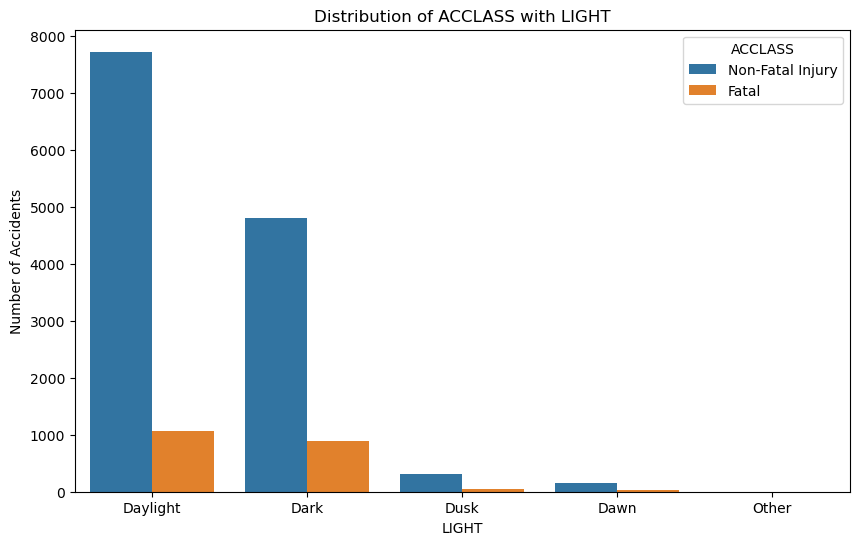

In [48]:
# Plotting the relationship between ACCLASS and LIGHT
plt.figure(figsize = (10,6))
sns.countplot(data=df, x='LIGHT', hue = 'ACCLASS', order=['Daylight', 'Dark', 'Dusk', 'Dawn', 'Other'])
plt.xlabel('LIGHT')
plt.ylabel('Number of Accidents')
plt.title('Distribution of ACCLASS with LIGHT')
plt.show()

#### RDFSCOND

In [49]:
#Values before imputing
df['RDSFCOND'].value_counts()

RDSFCOND
Dry                     11950
Wet                      2549
Loose Snow                144
Other                     135
Slush                      94
Ice                        63
Packed Snow                40
Loose Sand or Gravel        5
Spilled liquid              1
Name: count, dtype: int64

In [50]:
# Calculating the mode of the 'RDSFCOND' column for train
train_mode_value = df['RDSFCOND'].value_counts().idxmax()

# Imputing null values in 'RDSFCOND' with the mode value
df['RDSFCOND'] = df['RDSFCOND'].fillna(train_mode_value)

In [51]:
# Calculate the mode of the 'RDSFCOND' column for the test
test_mode_value = df1['RDSFCOND'].value_counts().idxmax()

# Impute null values in 'RDSFCOND' with the mode value
df1['RDSFCOND'] = df1['RDSFCOND'].fillna(test_mode_value)

In [52]:
#mapping
road_condition_mapping = {
    'Dry': 3,
    'Wet': 2,
    'Loose Snow': 1,
    'Other': 0,
    'Slush': 0,
    'Ice': 0,
    'Packed Snow': 0,
    'Loose Sand or Gravel': 0,
    'Spilled liquid ': 0
}

df['RDSFCOND'] = df['RDSFCOND'].map(road_condition_mapping)


In [53]:
# Calculating the mode of the 'RDSFCOND' column for the test
train_mode_value = df['RDSFCOND'].value_counts().idxmax()

# Imputing null values in 'RDSFCOND' with the mode value
df['RDSFCOND'] = df['RDSFCOND'].fillna(train_mode_value)

In [54]:
# Mapping for grouped categories
test_road_condition_mapping = {
    'Dry': 3,
    'Wet': 2,
    'Loose Snow': 1,
    'Other': 0,
    'Slush': 0,
    'Ice': 0,
    'Packed Snow': 0,
    'Loose Sand or Gravel': 0,
    'Spilled liquid ': 0
}

df1['RDSFCOND'] =df1['RDSFCOND'].map(test_road_condition_mapping)

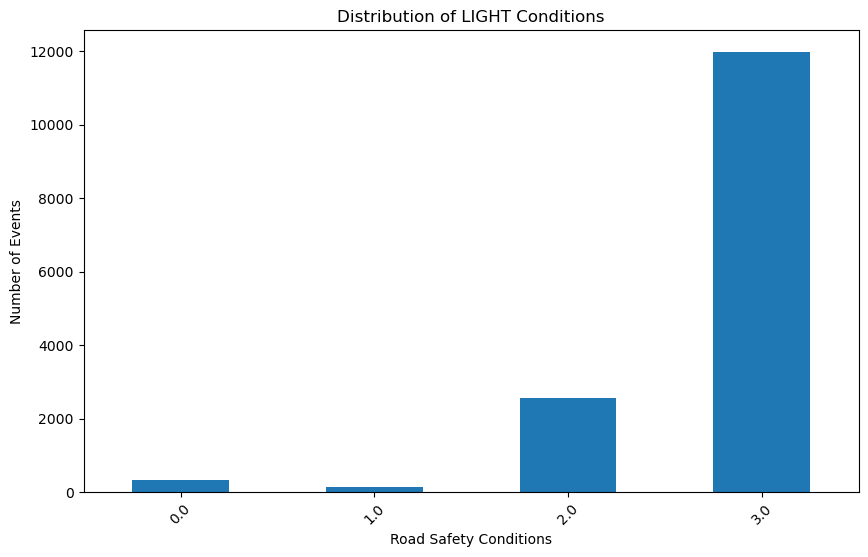

In [55]:
# Plotting the distribution of the RDSFCOND column
plt.figure(figsize=(10, 6))
df['RDSFCOND'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of LIGHT Conditions')
plt.xlabel('Road Safety Conditions')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

#### INVTYPE

In [56]:
# Calculating the mode of the 'INVTYPE' column for train
train_mode_value = df['INVTYPE'].value_counts().idxmax()

# Imputing null values in 'INVTYPE' with the mode value
df['INVTYPE'] = df['INVTYPE'].fillna(train_mode_value)

In [57]:
# Calculating the mode of the 'INVTYPE' column for test
test_mode_value = df1['INVTYPE'].value_counts().idxmax()

# Imputing null values in 'INVTYPE' with the mode value
df1['INVTYPE'] = df1['INVTYPE'].fillna(test_mode_value)

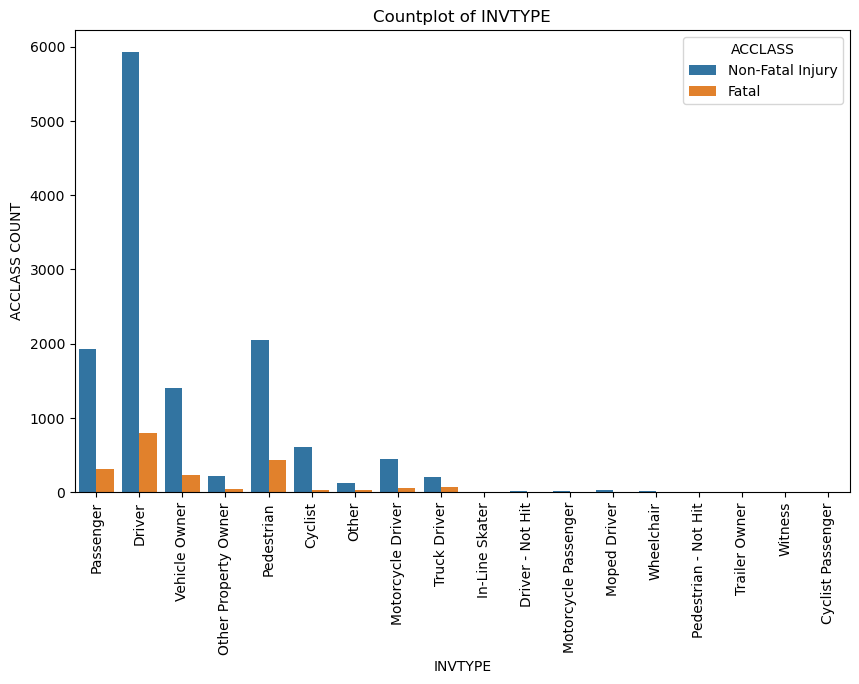

In [58]:
#### Lets visualize the INVTYPE
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='INVTYPE', hue = 'ACCLASS')
plt.xlabel('INVTYPE')
plt.ylabel('ACCLASS COUNT')
plt.title('Countplot of INVTYPE')
ax.tick_params(axis='x', rotation=90)
plt.show()

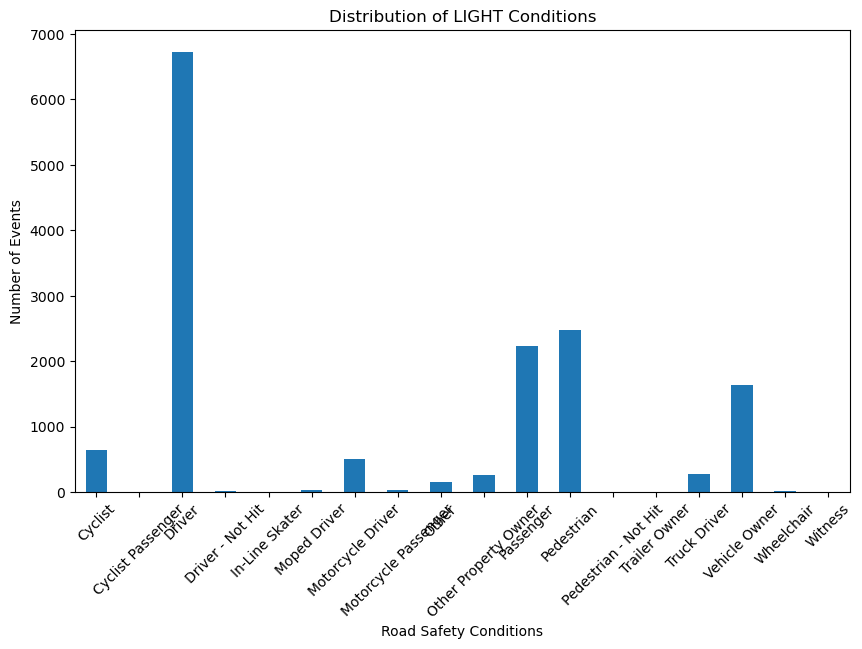

In [59]:
# Plotting the distribution of the INVTYPE column
plt.figure(figsize=(10, 6))
df['INVTYPE'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of LIGHT Conditions')
plt.xlabel('Road Safety Conditions')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

#### IMPACTYPE

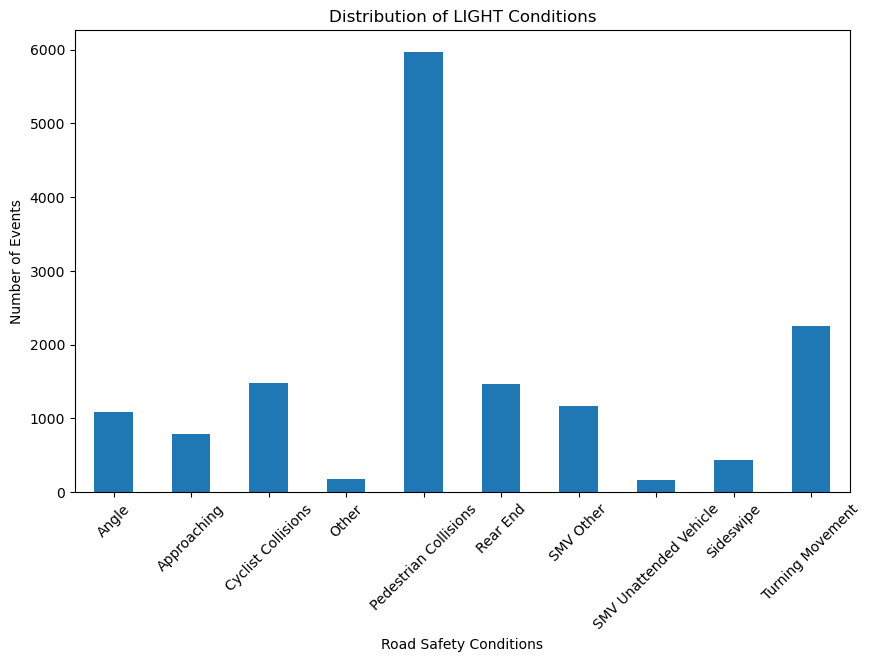

In [60]:
# Plotting the distribution of the IMPACTYPE column
plt.figure(figsize=(10, 6))
df['IMPACTYPE'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of LIGHT Conditions')
plt.xlabel('Road Safety Conditions')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

In [61]:
df.IMPACTYPE.value_counts()

IMPACTYPE
Pedestrian Collisions     5966
Turning Movement          2259
Cyclist Collisions        1480
Rear End                  1469
SMV Other                 1169
Angle                     1090
Approaching                792
Sideswipe                  431
Other                      173
SMV Unattended Vehicle     171
Name: count, dtype: int64

In [62]:
# Comparing Impact type and ACC Class
df.groupby('IMPACTYPE') ['ACCLASS'].value_counts()

IMPACTYPE               ACCLASS         
Angle                   Non-Fatal Injury     960
                        Fatal                130
Approaching             Non-Fatal Injury     642
                        Fatal                150
Cyclist Collisions      Non-Fatal Injury    1378
                        Fatal                102
Other                   Non-Fatal Injury     162
                        Fatal                 11
Pedestrian Collisions   Non-Fatal Injury    4912
                        Fatal               1054
Rear End                Non-Fatal Injury    1385
                        Fatal                 84
SMV Other               Non-Fatal Injury     945
                        Fatal                224
SMV Unattended Vehicle  Non-Fatal Injury     142
                        Fatal                 29
Sideswipe               Non-Fatal Injury     401
                        Fatal                 30
Turning Movement        Non-Fatal Injury    2051
                        Fata

In [63]:
df.drop(columns=['IMPACTYPE' , 'DRIVACT' , 'DRIVCOND' ,'PEDTYPE' ,  'PEDACT' ,  'PEDCOND' , 'CYCLISTYPE' ,  'CYCACT' , 'CYCCOND'  ], inplace=True)

In [64]:
df1.drop(columns=['IMPACTYPE' , 'DRIVACT' , 'DRIVCOND' ,'PEDTYPE' ,  'PEDACT' ,  'PEDCOND' , 'CYCLISTYPE' ,  'CYCACT' , 'CYCCOND'  ], inplace=True)

#### Dropping Columns like 'IMPACTYPE' , 'DRIVACT' , 'DRIVCOND' ,'PEDTYPE' ,  'PEDACT' ,  'PEDCOND' , 'CYCLISTYPE' ,  'CYCACT' , 'CYCCOND' as we can already gain these information from columns like 'INVTYPE'

#### INVAGE

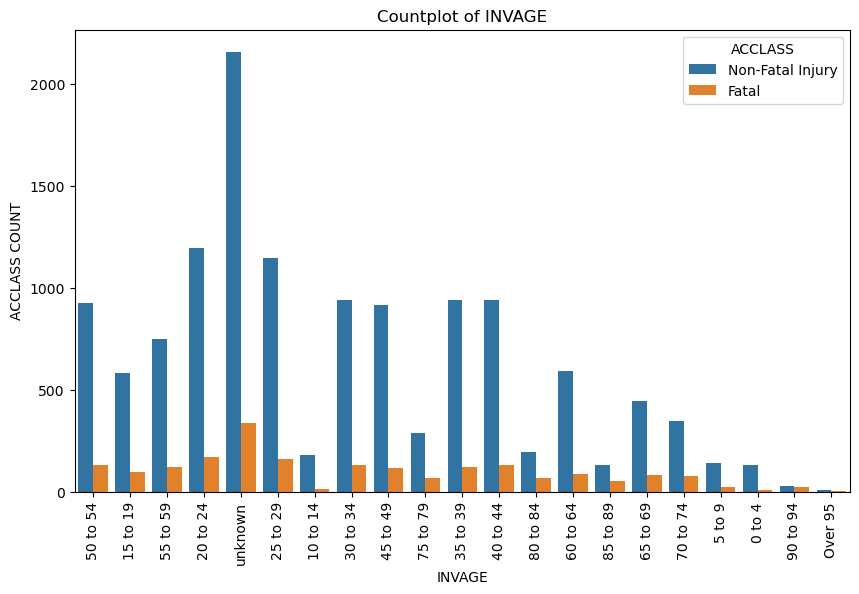

In [65]:
#### Visualizing the INVAGE to find some patterns
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='INVAGE', hue = 'ACCLASS')
plt.xlabel('INVAGE')
plt.ylabel('ACCLASS COUNT')
plt.title('Countplot of INVAGE')
ax.tick_params(axis='x', rotation=90)
plt.show()

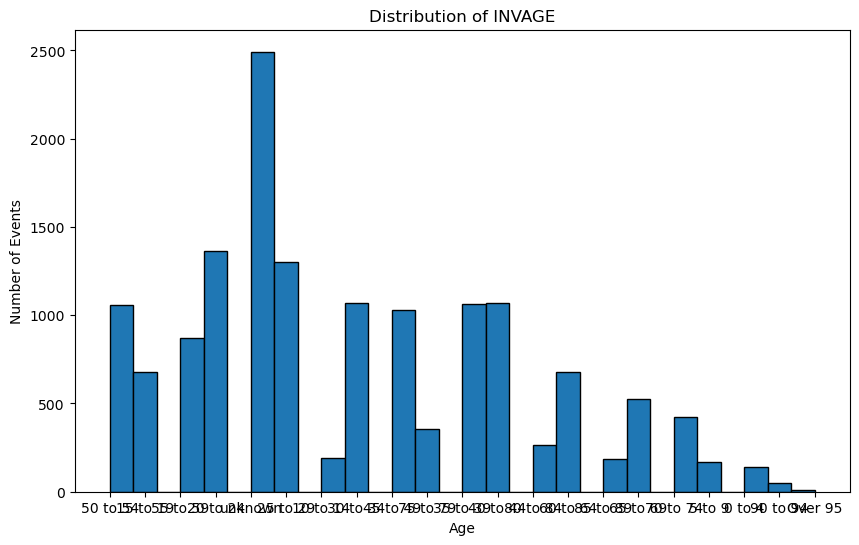

In [66]:
# Plotting the distribution of the INVAGE column using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['INVAGE'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of INVAGE')
plt.xlabel('Age')
plt.ylabel('Number of Events')
plt.show()

In [67]:
df.INVAGE.unique()

array(['50 to 54', '15 to 19', '55 to 59', '20 to 24', 'unknown',
       '25 to 29', '10 to 14', '30 to 34', '45 to 49', '75 to 79',
       '35 to 39', '40 to 44', '80 to 84', '60 to 64', '85 to 89',
       '65 to 69', '70 to 74', '5 to 9', '0 to 4', '90 to 94', 'Over 95'],
      dtype=object)

In [68]:
# Applying the mapping of age ranges to ordinal values in the 'INVAGE' column
train_ordinal_mapping = {
    '0 to 4': 0, '5 to 9': 0, '10 to 14': 0, '15 to 19': 0, '20 to 24': 2, '25 to 29': 2,
    '30 to 34': 2, '35 to 39': 2, '40 to 44': 3, '45 to 49': 3, '50 to 54':  3,
    '55 to 59':  3, '60 to 64': 4, '65 to 69': 4, '70 to 74': 4, '75 to 79': 4,
    '80 to 84': 5, '85 to 89': 5, '90 to 94': 5, 'Over 95': 5, 'unknown': -1
}

# Apply the mapping
df['INVAGE'] = df['INVAGE'].map(train_ordinal_mapping)

In [69]:
test_ordinal_mapping = {
    '0 to 4': 0, '5 to 9': 0, '10 to 14': 0, '15 to 19': 0, '20 to 24': 2, '25 to 29': 2,
    '30 to 34': 2, '35 to 39': 2, '40 to 44': 3, '45 to 49': 3, '50 to 54':  3,
    '55 to 59':  3, '60 to 64': 4, '65 to 69': 4, '70 to 74': 4, '75 to 79': 4,
    '80 to 84': 5, '85 to 89': 5, '90 to 94': 5, 'Over 95': 5, 'unknown': -1
}

# Apply the mapping
df1['INVAGE'] = df1['INVAGE'].map(test_ordinal_mapping)

#### INJURY

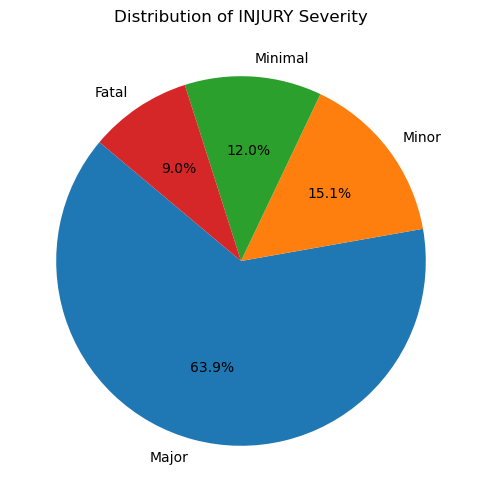

In [70]:
# Plotting the distribution of the INJURY column using a pie chart
plt.figure(figsize=(10, 6))
df['INJURY'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of INJURY Severity')
plt.ylabel('')  # Hide the y-label
plt.show()

In [71]:
df['INJURY'] = df['INJURY'].fillna('Unknown')
# Filling Injury column with Unknown as it prevents dataloss while restoring the information 

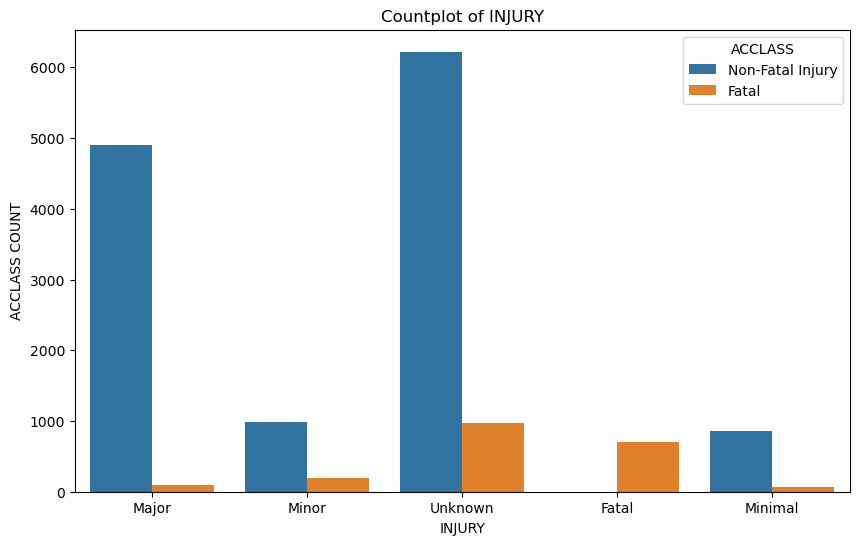

In [72]:
#### Visualizing the INJURY
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='INJURY', hue = 'ACCLASS')
plt.xlabel('INJURY')
plt.ylabel('ACCLASS COUNT')
plt.title('Countplot of INJURY')
plt.show()

In [73]:
# Giving higher values to Fatal while encoding Injury
train_injury_mapping = {
    'Fatal': 4,
    'Major': 3,
    'Minor': 2,
    'Minimal': 1,
    'Unknown': 0
}

# Applying the mapping to create a new column
df['INJURY'] = df['INJURY'].map(train_injury_mapping)

In [74]:
df1['INJURY'] = df1['INJURY'].fillna('Unknown')

In [75]:

test_injury_mapping = {
    'Fatal': 4,
    'Major': 3,
    'Minor': 2,
    'Minimal': 1,
    'Unknown': 0
}


df1['INJURY'] = df1['INJURY'].map(test_injury_mapping)

<Figure size 1000x600 with 0 Axes>

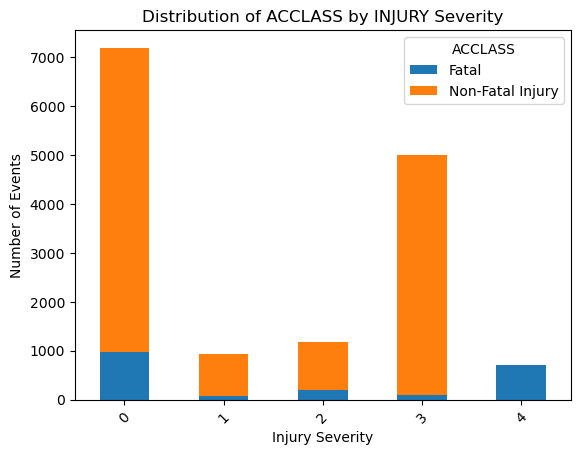

In [76]:
# Creating a crosstab to show the relationship between INJURY and ACCLASS
injury_acclass_crosstab = pd.crosstab(df['INJURY'], df['ACCLASS'])

# Plotting the relationship using a bar plot
plt.figure(figsize=(10, 6))
injury_acclass_crosstab.plot(kind='bar', stacked=True)
plt.title('Distribution of ACCLASS by INJURY Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Events')
plt.legend(title='ACCLASS')
plt.xticks(rotation=45)
plt.show()

#### FATAL_NO

In [77]:
# Dropping the 'fatal_no' column from the DataFrame
df = df.drop(columns=['FATAL_NO'])
# Drop the 'fatal_no' column from the df1
df1 = df1.drop(columns=['FATAL_NO'])

#### INITDIR 


In [78]:
# Imputing INITDIR with Unknown
df['INITDIR'] = df['INITDIR'].fillna('Unknown')

In [79]:
df1['INITDIR'] = df1['INITDIR'].fillna('Unknown')

In [80]:
df['INITDIR'].value_counts()

INITDIR
Unknown    4859
East       2650
West       2552
South      2487
North      2452
Name: count, dtype: int64

- The distribution is similar for all 4 directions, lets drop this column

In [81]:
#Dropping INITDIR
df.drop(columns=['INITDIR'], inplace=True)
df1.drop(columns=['INITDIR'], inplace=True)

#### VEHTYPE 

In [82]:
#Filling vehicle tyepe with unknown
df['VEHTYPE'] = df['VEHTYPE'].fillna('Unknown')

In [83]:
# Mapping for grouped categories in 'VEHTYPE' including 'Unknown'
train_vehtype_mapping = {
    'Automobile, Station Wagon': 'Automobile - Car, Van',
    'Other': 'Other',
    'Unknown': 'Unknown',
    'Bicycle': 'Other',
    'Motorcycle': 'Motorbikes',
    'Municipal Transit Bus (TTC)': 'Bus',
    'Truck - Open': 'Trucks',
    'Pick Up Truck': 'Trucks',
    'Passenger Van': 'Automobile - Car, Van',
    'Delivery Van': 'Trucks',
    'Truck - Closed (Blazer, etc)': 'Trucks',
    'Street Car': 'Other',
    'Truck - Dump': 'Trucks',
    'Taxi': 'Automobile - Car, Van',
    'Truck-Tractor': 'Trucks',
    'Moped': 'Motorbikes',
    'Bus (Other) (Go Bus, Gray Coa': 'Bus',
    'Truck (other)': 'Trucks',
    'Intercity Bus': 'Bus',
    'Tow Truck': 'Trucks',
    'School Bus': 'Bus',
    'Truck - Tank': 'Trucks',
    'Police Vehicle': 'Police Vehicle',
    'Construction Equipment': 'Other',
    'Fire Vehicle': 'Emergency Vehicle',
    'Other Emergency Vehicle': 'Emergency Vehicle',
    'Off Road - 2 Wheels': 'Other',
    'Truck - Car Carrier': 'Trucks'
}

# Applying the mapping to the 'VEHTYPE' column
df['VEHTYPE'] = df['VEHTYPE'].replace(train_vehtype_mapping)

# Display the value counts for the new grouped categories
print(df['VEHTYPE'].value_counts())

VEHTYPE
Automobile - Car, Van    6280
Other                    5413
Unknown                  2056
Motorbikes                527
Trucks                    470
Bus                       248
Police Vehicle              3
Emergency Vehicle           3
Name: count, dtype: int64


In [84]:
df1['VEHTYPE'] = df1['VEHTYPE'].fillna('Unknown')

In [85]:
# Mapping for grouped categories in 'VEHTYPE' including 'Unknown'
test_vehtype_mapping = {
    'Automobile, Station Wagon': 'Automobile - Car, Van',
    'Other': 'Other',
    'Unknown': 'Unknown',
    'Bicycle': 'Other',
    'Motorcycle': 'Motorbikes',
    'Municipal Transit Bus (TTC)': 'Bus',
    'Truck - Open': 'Trucks',
    'Pick Up Truck': 'Trucks',
    'Passenger Van': 'Automobile - Car, Van',
    'Delivery Van': 'Trucks',
    'Truck - Closed (Blazer, etc)': 'Trucks',
    'Street Car': 'Other',
    'Truck - Dump': 'Trucks',
    'Taxi': 'Automobile - Car, Van',
    'Truck-Tractor': 'Trucks',
    'Moped': 'Motorbikes',
    'Bus (Other) (Go Bus, Gray Coa': 'Bus',
    'Truck (other)': 'Trucks',
    'Intercity Bus': 'Bus',
    'Tow Truck': 'Trucks',
    'School Bus': 'Bus',
    'Truck - Tank': 'Trucks',
    'Police Vehicle': 'Police Vehicle',
    'Construction Equipment': 'Other',
    'Fire Vehicle': 'Emergency Vehicle',
    'Other Emergency Vehicle': 'Emergency Vehicle',
    'Off Road - 2 Wheels': 'Other',
    'Truck - Car Carrier': 'Trucks'
}

# Applying the mapping to the 'VEHTYPE' column
df1['VEHTYPE'] = df1['VEHTYPE'].replace(test_vehtype_mapping)

# Display the value counts for the new grouped categories
print(df1['VEHTYPE'].value_counts())

VEHTYPE
Automobile - Car, Van    1695
Unknown                  1437
Trucks                    276
Motorbikes                244
Other                     216
Bus                        76
Police Vehicle              4
Rickshaw                    4
Emergency Vehicle           1
Ambulance                   1
Off Road - 4 Wheels         1
Off Road - Other            1
Name: count, dtype: int64


#### MANOEUVER

In [86]:
#Filling Manoeuver with unknown
df['MANOEUVER'] = df['MANOEUVER'].fillna('Unknown')

In [87]:
df1['MANOEUVER'] = df1['MANOEUVER'].fillna('Unknown')

#### PEDESTRIAN, CYCLIST,  AUTOMOBILE, MOTORCYCLE, TRUCK, TRSN_CITY_VEH

In [88]:
#Imputing with "no"
df[['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH']] = df[['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH']].fillna('No')
df1[['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH']] = df1[['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH']].fillna('No')

#### EMERG_VEH, PASSENGER, PASSENGER, PASSENGER, AG_DRIV, REDLIGHT, ALCOHOL, DISABILITY

In [89]:
#Imputing with No
df[['EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']] = df[['EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']].fillna('No')
df1[['EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']] = df1[['EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']].fillna('No')

#### Columns related to Neighborhood

#### HOOD_158

In [90]:
df['HOOD_158'].head()

0    60
1    60
2    60
3    60
4    60
Name: HOOD_158, dtype: object

#### NEIGHBOURHOOD_158

In [91]:
train_neighbour = df[['NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'ACCLASS']]
train_neighbour.head()

,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ACCLASS
0,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,Non-Fatal Injury
1,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,Non-Fatal Injury
2,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,Non-Fatal Injury
3,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,Non-Fatal Injury
4,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,Non-Fatal Injury


In [92]:
train_neighbour[['NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140']]

,NEIGHBOURHOOD_158,NEIGHBOURHOOD_140
0,Woodbine-Lumsden,Woodbine-Lumsden (60)
1,Woodbine-Lumsden,Woodbine-Lumsden (60)
2,Woodbine-Lumsden,Woodbine-Lumsden (60)
3,Woodbine-Lumsden,Woodbine-Lumsden (60)
4,Woodbine-Lumsden,Woodbine-Lumsden (60)
...,...,...
14995,Cliffcrest,Cliffcrest (123)
14996,Wychwood,Wychwood (94)
14997,Wychwood,Wychwood (94)
14998,Agincourt North,Agincourt North (129)


- All four features are similar, lets drop them

In [93]:
df.drop(columns=['NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140', 'HOOD_140', 'DIVISION', 'ACCNUM'], inplace=True)
df1.drop(columns=['NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140', 'HOOD_140', 'DIVISION', 'ACCNUM'], inplace=True)

#### Dropping 'NEIGHBOURHOOD_158', 'NEIGHBOURHOOD_140', 'HOOD_140', 'DIVISION', 'ACCNUM' but keeping 'Hood 158' as we found out through some research that it is the updated version compared to other columns 

In [94]:
df.isnull().sum()

ROAD_CLASS         0
ACCLOC             0
TRAFFCTL           0
VISIBILITY         0
LIGHT              0
RDSFCOND           0
ACCLASS            0
INVTYPE            0
INVAGE             0
INJURY             0
VEHTYPE            0
MANOEUVER          0
PEDESTRIAN         0
CYCLIST            0
AUTOMOBILE         0
MOTORCYCLE         0
TRUCK              0
TRSN_CITY_VEH      0
EMERG_VEH          0
PASSENGER          0
SPEEDING           0
AG_DRIV            0
REDLIGHT           0
ALCOHOL            0
DISABILITY         0
HOOD_158           0
STREET1-STREET2    0
dtype: int64

In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ROAD_CLASS       3956 non-null   object
 1   ACCLOC           3956 non-null   object
 2   TRAFFCTL         3956 non-null   object
 3   VISIBILITY       3956 non-null   int64 
 4   LIGHT            3956 non-null   object
 5   RDSFCOND         3956 non-null   int64 
 6   INVTYPE          3956 non-null   object
 7   INVAGE           3956 non-null   int64 
 8   INJURY           3956 non-null   int64 
 9   VEHTYPE          3956 non-null   object
 10  MANOEUVER        3956 non-null   object
 11  PEDESTRIAN       3956 non-null   object
 12  CYCLIST          3956 non-null   object
 13  AUTOMOBILE       3956 non-null   object
 14  MOTORCYCLE       3956 non-null   object
 15  TRUCK            3956 non-null   object
 16  TRSN_CITY_VEH    3956 non-null   object
 17  EMERG_VEH        3956 non-null   

In [96]:
df1.isnull().sum()

ROAD_CLASS         0
ACCLOC             0
TRAFFCTL           0
VISIBILITY         0
LIGHT              0
RDSFCOND           0
INVTYPE            0
INVAGE             0
INJURY             0
VEHTYPE            0
MANOEUVER          0
PEDESTRIAN         0
CYCLIST            0
AUTOMOBILE         0
MOTORCYCLE         0
TRUCK              0
TRSN_CITY_VEH      0
EMERG_VEH          0
PASSENGER          0
SPEEDING           0
AG_DRIV            0
REDLIGHT           0
ALCOHOL            0
DISABILITY         0
HOOD_158           0
STREET1-STREET2    0
dtype: int64

#### Null values have all been Cleared

In [97]:
df.shape

(15000, 27)

In [98]:
df1.shape

(3956, 26)

#### Declare TARGET, FEATURES

In [99]:
# Defining target and features
target = 'ACCLASS'  # Ensure your target variable is appropriate for regression
features = [col for col in df.columns if col != target]

In [100]:
#Dropping ACCLASS as it is our target variable
X = df.drop(columns=['ACCLASS'])
y = df.ACCLASS

#### Label Encoding our target - y(ACCLASS)

In [101]:
y = y.replace({'Fatal': 1, 'Non-Fatal Injury': 0})

In [102]:
y.unique()

array([0, 1], dtype=int64)

####  Categorical and Numerical Columns involved in prediction

In [103]:
categorical_columns = X.select_dtypes(include=['object']).columns
categorical_columns

Index(['ROAD_CLASS', 'ACCLOC', 'TRAFFCTL', 'LIGHT', 'INVTYPE', 'VEHTYPE',
       'MANOEUVER', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE',
       'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING',
       'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158',
       'STREET1-STREET2'],
      dtype='object')

In [104]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['VISIBILITY', 'RDSFCOND', 'INVAGE', 'INJURY'], dtype='object')

#### Transformation

In [105]:
# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])


#### Preprocessor using Column Transformer

In [106]:
# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)


#### TRAIN TEST SPLIT
- using Stratified Split
- Test size is 25%

In [107]:
X.shape

(15000, 26)

In [108]:
y.shape

(15000,)

In [109]:
#stratified sampling based on the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086, stratify=y) 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (11250, 26)
X_test.shape: (3750, 26)
y_train.shape: (11250,)
y_test.shape: (3750,)


In [110]:
np.unique(y_train, return_counts = True) # Getting unique values and their counts in y_train

(array([0, 1], dtype=int64), array([9733, 1517], dtype=int64))

In [111]:
np.unique(y_test, return_counts = True)

(array([0, 1], dtype=int64), array([3245,  505], dtype=int64))

In [112]:
preprocessor.fit(X_train)   # Fitting the preprocessor to the training data
X_train_transformed = preprocessor.transform(X_train)   # Transforming the training data using the fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)     # Transforming the test data using the fitted preprocessor
print(f"X_train_transformed.shape: {X_train_transformed.shape}") 
print(f"X_test_transformed.shape: {X_test_transformed.shape}")  

C:\Users\daivi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


X_train_transformed.shape: (11250, 4224)
X_test_transformed.shape: (3750, 4224)


### Prediction Probabilities for Random Forest Classifier, KNN and Logistic Regression
- Calculating the Probability Scores

In [113]:
#Using the two classifiers - Random Forest and KNN Neighbors

#Creating the random forest Classifier
from sklearn.ensemble import RandomForestClassifier

random_forest_Classifier = RandomForestClassifier()
random_forest_Classifier.fit(X_train_transformed,y_train)

#Evaluating the ramdon forest model on the training set
from sklearn.model_selection import cross_val_predict
y_probas_forest = cross_val_predict(random_forest_Classifier,X_train_transformed,y_train, cv=4,
                                    method="predict_proba")
y_forest_scores = y_probas_forest[:, 1] # score = proba of positive class


#Creating the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

k_Neighbors_Classifer = KNeighborsClassifier()
k_Neighbors_Classifer.fit(X_train_transformed,y_train)

#Evaluating the KNN model on the training set
from sklearn.model_selection import cross_val_predict
y_probas_neighbors = cross_val_predict(k_Neighbors_Classifer,X_train_transformed,y_train, cv=4,
                                    method="predict_proba")

y_neighbor_scores = y_probas_neighbors[:, 1] # score = proba of positive class


# Creating it for Logistic Regression

logistic_regression = LogisticRegression(max_iter=200, solver='liblinear')
logistic_regression.fit(X_train_transformed, y_train)

# Evaluating the Logistic Regression model on the training set
y_probas_logistic = cross_val_predict(logistic_regression, X_train_transformed, y_train, cv=4,
                                      method="predict_proba")
y_logistic_scores = y_probas_logistic[:, 1] 


### Naive Bayes
gausian_nb = GaussianNB()
y_pred = gausian_nb.fit(X_train_transformed, y_train)

# Evaluating the Guasian Naive Bayes model on the training set
y_probas_nb = cross_val_predict(gausian_nb,X_train_transformed,y_train, cv=4,
                                    method="predict_proba")
y_nb_scores = y_probas_nb[:, 1] # score = proba of positive class

In [114]:
print(y_logistic_scores)

[0.29384175 0.14426083 0.03485934 ... 0.26083666 0.0790771  0.0085197 ]


### ROC Curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
- True Positive Rate
- False Positive Rate

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

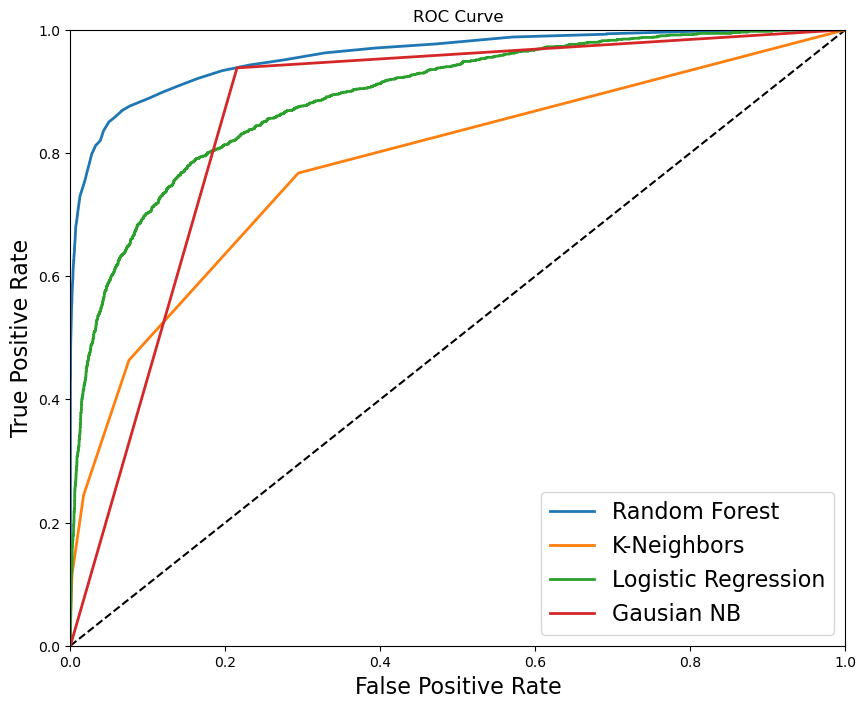

In [115]:
from sklearn.metrics import roc_curve

#for random forest
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_forest_scores)

#for K Neighbors
fpr_neighbors, tpr_neighbors, thresholds_neighbors = roc_curve(y_train,y_neighbor_scores)

# Calculating ROC curve for Logistic Regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_train, y_logistic_scores)

# Calculating the ROC Curve for Gausian Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_train, y_nb_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# Plotting the ROC Curves
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot(fpr_neighbors, tpr_neighbors, linewidth=2, label="K-Neighbors")
plt.plot(fpr_logistic, tpr_logistic, linewidth=2, label="Logistic Regression")
plt.plot(fpr_nb, tpr_nb, linewidth=2, label="Gausian NB")
plt.legend(loc="lower right", fontsize=16)
plt.title("ROC Curve")
plt.show()

#### AUC For Models
- AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve 
- AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example

AUC is desirable for the following two reasons:
- AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
- AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [116]:
# Calculating the AUC and choose the best model

from sklearn.metrics import roc_auc_score

auc_randomclassifier = roc_auc_score(y_train,y_forest_scores)
auc_KnnClassifier = roc_auc_score(y_train,y_neighbor_scores)
auc_logistic = roc_auc_score(y_train, y_logistic_scores)
auc_gnb = roc_auc_score(y_train, y_nb_scores)


# Printing the AUC scores
print(f"AUC for Random Forest: {auc_randomclassifier}")
print(f"AUC for K-Neighbors: {auc_KnnClassifier}")
print(f"AUC for Logistic Regression: {auc_logistic}")
print(f"AUC for Gausian Naive Bayes: {auc_gnb}")

AUC for Random Forest: 0.9586198365170081
AUC for K-Neighbors: 0.781835082395409
AUC for Logistic Regression: 0.8900236174006827
AUC for Gausian Naive Bayes: 0.8615483644013688


- Random Forest Classifier is performing the best according to our AUC Curve

### Random Forest Classifier Confusion Matrix

In [117]:
#Creating the confusion Matrix for Random Forest
from sklearn.metrics import confusion_matrix

#need to create a binary classifier as Classification metrics can't handle a mix of binary and continuous targets
predict_RClassifier = cross_val_predict(random_forest_Classifier,X_train_transformed,y_train, cv=4)
conf_matrix_rf = confusion_matrix(y_train,predict_RClassifier)
print(conf_matrix_rf)

[[9723   10]
 [ 701  816]]


#### Precision and Recall Score for Random Forest Classifier

In [118]:
#Printing the Precision / Recall Score for Random Forest Classifier
from sklearn.metrics import precision_score, recall_score
print("Precision score for Random Forest Classifier ",precision_score(y_train,predict_RClassifier))
print("Recall score for Random Forest Classifier ",recall_score(y_train,predict_RClassifier))

Precision score for Random Forest Classifier  0.9878934624697336
Recall score for Random Forest Classifier  0.5379037574159525


Our Recall Score is not good

### Confusion Matrix for Random Forest Classifier

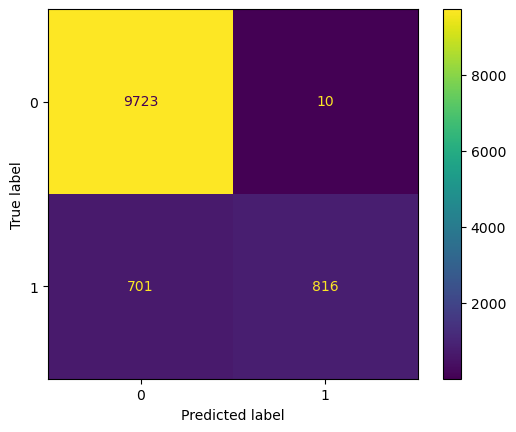

In [119]:
# declaring conf_matric_rf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp.plot()
plt.show()

- TP: 824
- TN: 9727
- FP: 6
- FN: 693

Our model correctly identifies a large number of Non-Fatal Injuries, but needs improvement for prediction of Fatal Injuries
- Precision = TP/(TP+FP) = 824/(830) = 0.9927
- Recall = TP/(TP+FN) = 824/1517 = 0.543

This matches our observations

In [120]:
print("Classification Report:\n", classification_report(y_train, predict_RClassifier))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      9733
           1       0.99      0.54      0.70      1517

    accuracy                           0.94     11250
   macro avg       0.96      0.77      0.83     11250
weighted avg       0.94      0.94      0.93     11250



A recall of 0.54 for class 1 is bad

#### KNN Confusion Matrix

In [121]:
from sklearn.metrics import confusion_matrix

#need to create a binary classifier for K Neighbors as Classification metrics can't handle a mix of binary and continuous targets
predict_Kneighbors = cross_val_predict(k_Neighbors_Classifer,X_train_transformed,y_train, cv=4)
conf_matrix_knn = confusion_matrix(y_train,predict_Kneighbors)
print(conf_matrix_knn)

[[9567  166]
 [1146  371]]


In [122]:
#Print the Precision / Recall Score for KNN
from sklearn.metrics import precision_score, recall_score
print("Precision for KNN: ", precision_score(y_train,predict_Kneighbors))
print("Recall for KNN: ", recall_score(y_train,predict_Kneighbors))

Precision for KNN:  0.6908752327746741
Recall for KNN:  0.24456163480553725


### Confusion Matrix For KNN

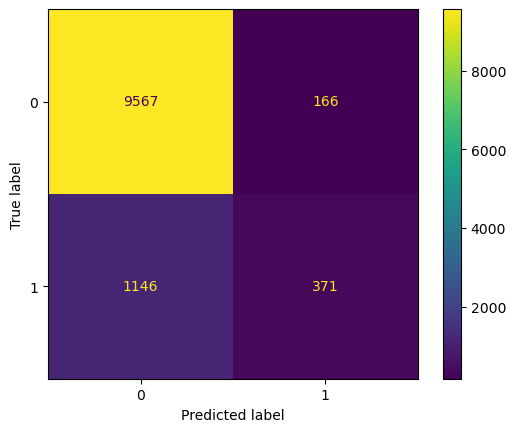

In [123]:
# Confusion Matrix display for KNN
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn)
disp.plot()
plt.show()

- TP: 370
- TN: 9581
- FP: 152
- FN: 1147

Our model correctly identifies a large number of Non-Fatal Injuries, but needs improvement for prediction of Fatal Injuries
- Precision = TP/(TP+FP) = 370/(522) = 0.7088
- Recall = TP/(TP+FN) = 370/1299 = 0.284

This matches our observations

### Logistic Regression

In [124]:
# Predicting the binary classifications using cross-validation for Logistic Regression
predict_LRClassifier = cross_val_predict(logistic_regression, X_train_transformed, y_train, cv=4)

# Creating the confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_train, predict_LRClassifier)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

Confusion Matrix for Logistic Regression:
[[9654   79]
 [1076  441]]


In [125]:
# Printing the Precision and Recall Score for Logistic Regression
precision_lr = precision_score(y_train, predict_LRClassifier)
recall_lr = recall_score(y_train, predict_LRClassifier)
print(f"Precision for Logistic Regression: {precision_lr}")
print(f"Recall for Logistic Regression: {recall_lr}")


Precision for Logistic Regression: 0.8480769230769231
Recall for Logistic Regression: 0.2907053394858273


### Confusion Matrix for Logistic Regression

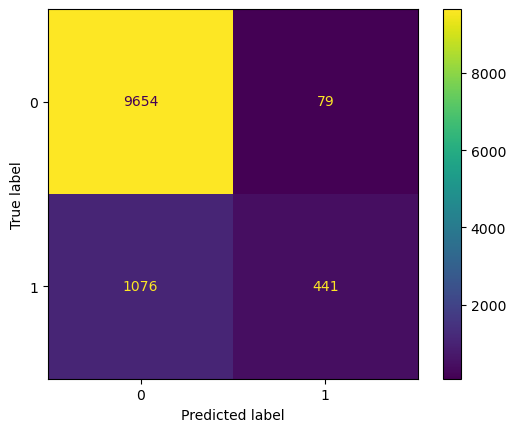

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr)
disp.plot()
plt.show()

- TP: 438
- TN: 9654
- FP: 79
- FN: 1079

Our model correctly identifies a large number of Non-Fatal Injuries, but needs improvement for prediction of Fatal Injuries
- Precision = TP/(TP+FP) = 438/(517) = 0.84719
- Recall = TP/(TP+FN) = 438/1517 = 0.288

This matches our observations

- Random Forest Classification has the best results for Precision and Recall 
- lets create a Precision and Recall Curve

### Gausian Naive Bayes

In [127]:
predict_gnb = cross_val_predict(gausian_nb, X_train_transformed, y_train, cv=4)

# Create a Confusion Matrix for Gausian Naive Bayes
conf_matrix_gnb = confusion_matrix(y_train, predict_gnb)
print("Confusion Matrix for Naive Bayes:")
print(conf_matrix_gnb)

Confusion Matrix for Naive Bayes:
[[7641 2092]
 [  94 1423]]


In [128]:
# Print the Precision and Recall Score for Gausian Naive Bayes
precision_gnb = precision_score(y_train, predict_gnb)
recall_gnb = recall_score(y_train, predict_gnb)
print(f"Precision for Logistic Regression: {precision_gnb}")
print(f"Recall for Logistic Regression: {recall_gnb}")

Precision for Logistic Regression: 0.40483641536273113
Recall for Logistic Regression: 0.9380355965721819


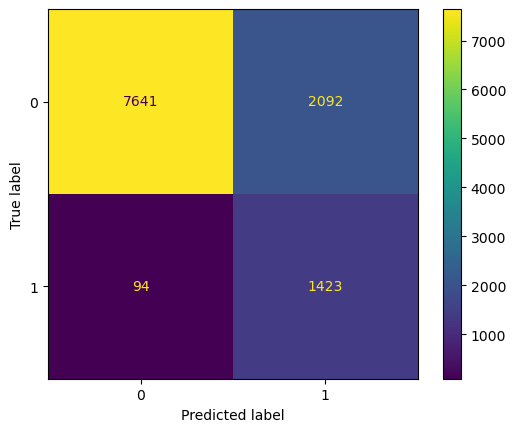

In [129]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gnb)
disp.plot()
plt.show()

- TP: 1423
- TN: 7641
- FP: 2092
- FN: 94

Our model correctly identifies a large number of Non-Fatal Injuries, but needs improvement for prediction of Fatal Injuries
- Precision = TP/(TP+FP) = 1423/(3515) = 0.4048
- Recall = TP/(TP+FN) = 1423/1517 = 0.938

This matches our observations

### Precision and Recall Curve for Random Forest Classifier

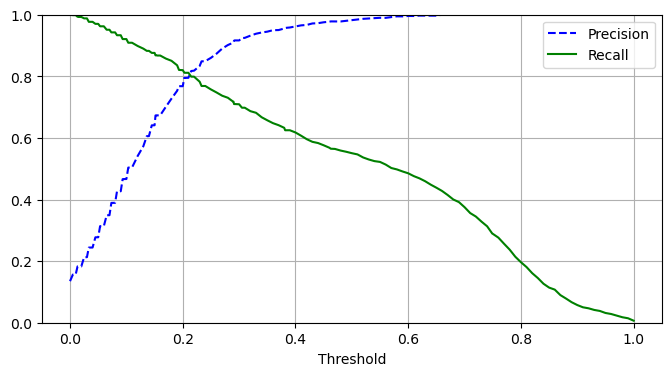

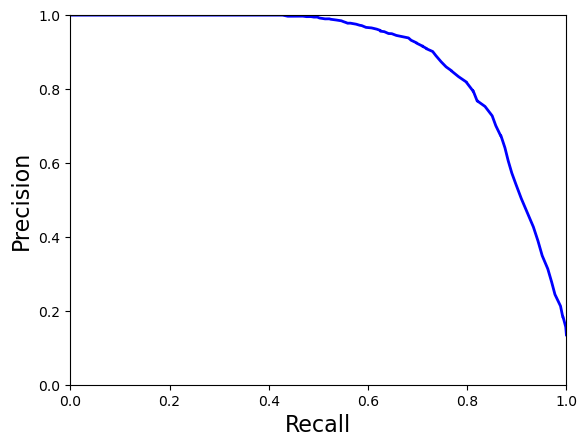

In [130]:
#create a precision - recall curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train,y_forest_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="best")
    plt.ylim([0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

#plot the precision and recall curve

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])


plot_precision_vs_recall(precisions, recalls)
plt.show()

In [131]:
#the Recall value for Random forest classifier is too low, thus we need to caliberate our threshhold 
#To change the threshholds, we consider changing the probabilities generated from the method = predict_proba

Recall_Threshhold = (y_forest_scores > .05)
print(precision_score(y_train,Recall_Threshhold))
print(recall_score(y_train,Recall_Threshhold))
Recall_Threshhold

0.3135065492806528
0.962425840474621


array([ True,  True,  True, ...,  True, False, False])

In [132]:
from sklearn.model_selection import cross_val_score

Average_Score = cross_val_score(random_forest_Classifier,X_train_transformed, Recall_Threshhold, cv = 4, scoring = "accuracy")

print(Average_Score) # [ 0.72333333  0.727       0.7195      0.71966667]

print(np.average(Average_Score))

[0.81834341 0.80838962 0.81507824 0.79836415]
0.8100438537495341


In [133]:
print("Classification Report:\n", classification_report(y_train, predict_RClassifier))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      9733
           1       0.99      0.54      0.70      1517

    accuracy                           0.94     11250
   macro avg       0.96      0.77      0.83     11250
weighted avg       0.94      0.94      0.93     11250



Use the new threshold on Grid Search for Random Forest

In [134]:
NewR_Threshhold = Recall_Threshhold.astype(int)

#Now run Grid Search on the RandomForest and use the new threshhold
from sklearn.model_selection import GridSearchCV
n_estimators = [3, 4, 6, 7, 10, 20, 50, 100]
param_grid = {'n_estimators' : n_estimators}

#tune the random forest classifier with the hyper parameters

Random_Forest_Classifier = RandomForestClassifier()
grid_search = GridSearchCV(Random_Forest_Classifier,param_grid,cv=4,refit = True,scoring='roc_auc', n_jobs = -1, verbose=2)
grid_search.fit(X_train_transformed, NewR_Threshhold)


Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [3, 4, 6, 7, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=2)

In [135]:
#get the best parameters and estimators
forest_best_param_ = grid_search.best_params_
forest_best_estimators_ = grid_search.best_estimator_

print(forest_best_param_)
print(forest_best_estimators_)

y_pred = forest_best_estimators_.predict(X_test_transformed)

{'n_estimators': 100}
RandomForestClassifier()


### After comparing the models it is found that RandomForestClassifier performs better compared to other models

In [136]:
y_pred_train = forest_best_estimators_.predict(X_train_transformed)

In [137]:
print("Classification Report:\n", classification_report(y_pred_train, NewR_Threshhold))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6588
           1       1.00      1.00      1.00      4662

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250



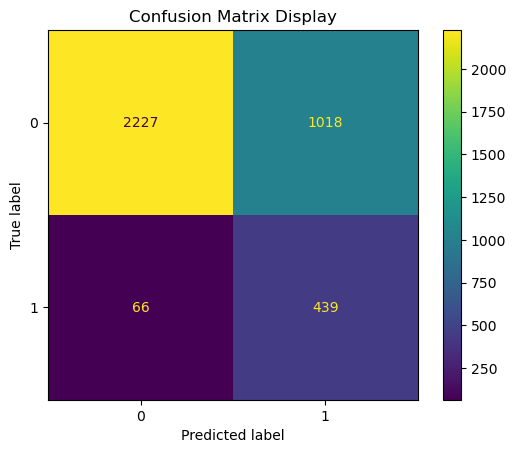

In [138]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix Display')
plt.show()

In [139]:
# Check the model accuracy for test set

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7109333333333333

In [140]:
print("Classification Report:\n", classification_report(y_test, y_pred))
# Play with the threshold values, goal is to not get recall as 1 but 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.69      0.80      3245
           1       0.30      0.87      0.45       505

    accuracy                           0.71      3750
   macro avg       0.64      0.78      0.63      3750
weighted avg       0.88      0.71      0.76      3750



- Our Recall For the Random Forest Classifier has improved from 0.55 to 0.87
- Our Model is performing lot better now

### Lets check predictions with Forest Best Estimators

In [141]:
test_processed = preprocessor.transform(df1[X.columns])

In [142]:
# Predict on the test data
test_predictions = forest_best_estimators_.predict(test_processed)
print("Predictions on test data:", test_predictions)

Predictions on test data: [1 1 1 ... 1 1 0]


In [143]:
# Convert 1 and 0 to descriptive labels
test_predictions_converted = np.where(test_predictions == 1, 'Fatal', 'Non-Fatal Injury')

print(test_predictions_converted)

['Fatal' 'Fatal' 'Fatal' ... 'Fatal' 'Fatal' 'Non-Fatal Injury']


In [144]:
results_df = pd.DataFrame({
    'OBJECTID': test['OBJECTID'],
    'ACCLASS': test_predictions_converted
})

In [145]:
results_df.head()

,OBJECTID,ACCLASS
0,15001,Fatal
1,15002,Fatal
2,15003,Fatal
3,15004,Non-Fatal Injury
4,15005,Fatal


In [146]:
results_df.shape

(3956, 2)

In [147]:
results_df.to_csv('results.csv', index=False)

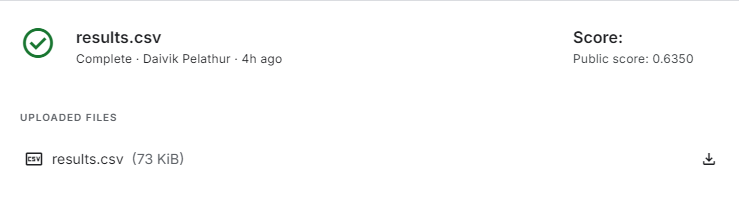

#### Kaggle result with hyper paramter tuning

### For Random Forest Classifier

In [148]:
# Predict on the test data
test_predictions = random_forest_Classifier.predict(test_processed)
print("Predictions on test data:", test_predictions)

Predictions on test data: [0 1 0 ... 0 0 0]


In [149]:
# Convert 1 and 0 to descriptive labels
test_predictions_converted = np.where(test_predictions == 1, 'Fatal', 'Non-Fatal Injury')

print(test_predictions_converted)

['Non-Fatal Injury' 'Fatal' 'Non-Fatal Injury' ... 'Non-Fatal Injury'
 'Non-Fatal Injury' 'Non-Fatal Injury']


In [150]:
resultsrf_df = pd.DataFrame({
    'OBJECTID': test['OBJECTID'],
    'ACCLASS': test_predictions_converted
})

In [151]:
resultsrf_df.to_csv('results1.csv', index=False)

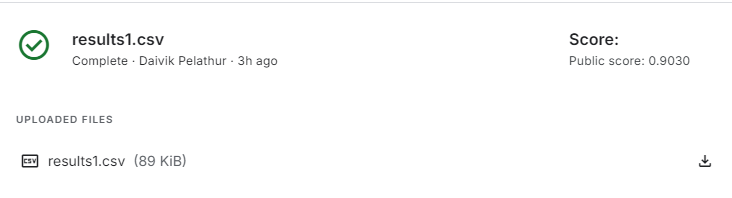

#### Kaggle Results with random forest classification

We worked on the Traffic Collision Dataset starting with cleaning the data by handling missing values, we also created several new features to improve our model. By applying 5 Machine Learning models we observed our highest score being 91% accuracy in Kaggle due to our random forest classifier. We then performed Grid Search CV to find the best parametres. After testing on kaggle again we observed our accuracy had dropped.
After comparing all our results in Kaggle; we achieved an accuracy of 63.50 using our model with the hyperparameters and an accuracy of 90.30% for our model without hyperparameter tuning on the Test Data. Our highest accuracy was 91.0% on Kaggle.